### 목표
- 보스턴에 있는 주택들의 데이터를 바탕으로 집 가격을 예측해보자!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings 
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

### 데이터 수집
- 보스턴 집 값 데이터셋 로드

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
# data : 문제 데이터
# target: 정답 데이터
# feature_names: 컬럼명 (특성명)
# DESCR: feaute_names에 대한 설명
# filename: 파일 경로 및 이름

In [8]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

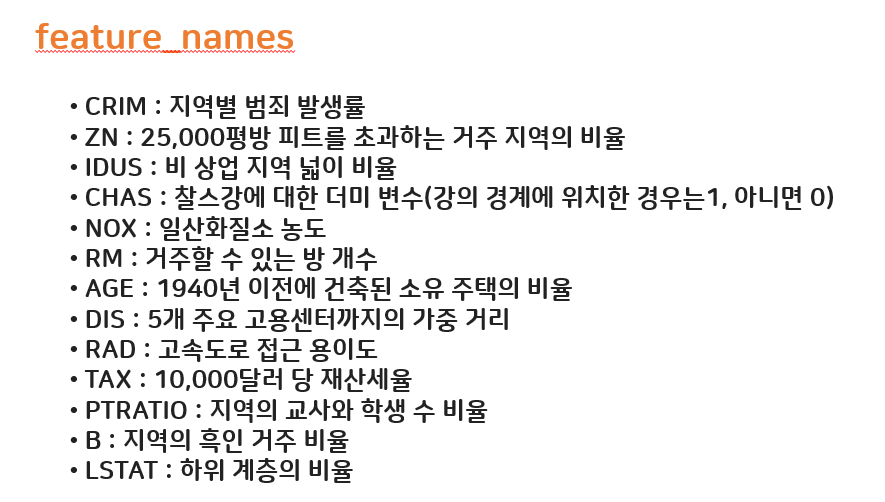

### 데이터 전처리 
- 필요없음 (학습용 데이터)

### 탐색적 데이터 분석
- 생략

### 모델링 (선택, 학습, 평가)
- 문제, 정답 데이터 설정
- 학습, 평가 데이터 설정

In [16]:
# 문제 설정 (data)
dfX =  pd.DataFrame (boston['data'], columns=boston['feature_names'])
dfX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
# 정답 설정 (target)
dfY = pd.DataFrame(boston['target'],columns=['price'])
dfY

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [19]:
# 학습, 평가 데이터 설정
from sklearn.model_selection import train_test_split

In [21]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [22]:
dfY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [36]:
X_train, X_test,y_train, y_test = train_test_split(dfX,dfY,
                                                   test_size =0.3,
                                                   random_state=5
                                                                   )

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


- 선형회귀 모델 적용

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
linear_model = LinearRegression()

In [42]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [43]:
# 특성의 개수만큼 w값이 출력
linear_model.coef_ # 선형회귀 직선의 w값 확인

array([[-1.54486040e-01,  4.13948217e-02, -2.53765225e-02,
         7.86055259e-01, -1.29365836e+01,  4.03952301e+00,
        -1.05354914e-02, -1.33498644e+00,  3.18272501e-01,
        -1.26427463e-02, -9.77287564e-01,  1.26714702e-02,
        -4.62052176e-01]])

In [44]:
linear_model.intercept_   # 선형회귀 직선의 b값 (y절편) 확인

array([31.7303513])

- 모델 평가: MSE, RMSE,R2스코어 확인

In [45]:
# 선형회귀 모델로 예측한 값을 변수에 저장
pre_train = linear_model.predict(X_train)
pre_test = linear_model.predict(X_test)

In [48]:
# train 데이트의 mse
train_mse = mean_squared_error(pre_train,y_train)
# test 데이터의 mse
test_mse = mean_squared_error(pre_test,y_test)

print('train 데이터 MSE:', train_mse)
print('test 데이터 MSE:', test_mse)
print('train 데이터, test 데이터의 MSE 차이:', test_mse-train_mse)

train 데이터 MSE: 19.068341850927226
test 데이터 MSE: 30.69703770408852
train 데이터, test 데이터의 MSE 차이: 11.628695853161293


In [49]:
# train 데이트의 rmse
train_rmse = mean_squared_error(pre_train,y_train)
# test 데이터의 rmse
test_rmse = mean_squared_error(pre_test,y_test)

print('train 데이터 RMSE:', train_mse**0.5)
print('test 데이터 RMSE:', test_mse**0.5)
print('train 데이터 RMSE 차이:', test_mse-train_mse**0.5)

train 데이터 RMSE: 4.366731254717563
test 데이터 RMSE: 5.540490745781327
train 데이터 RMSE 차이: 26.330306449370955


In [50]:
# 정답 데이터 (집 가격)의 평균 수치 값을 확인해보자!
print('train 데이터 주택 가격 평균: ', y_train['price'].mean())
print('train 데이터 주택 가격 평균: ', y_test['price'].mean() )

train 데이터 주택 가격 평균:  22.556214689265538
train 데이터 주택 가격 평균:  22.478289473684214


In [52]:
# train 데이터의 R2 스코어
linear_model.score(X_train,y_train)

0.7611598772034454

In [54]:
# test 데이터의 R2 스코어
linear_model.score(X_test,y_test)

0.67716969998517